In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel("Opportunity Dataset.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 11 columns):
ID                                        5500 non-null int64
Headline                                  5500 non-null object
Description                               5498 non-null object
Funding                                   2097 non-null object
Deadline                                  5496 non-null object
Type of opportunity                       5485 non-null object
Sub tags                                  2607 non-null object
Discipline                                5483 non-null object
Minimum Qualification / Applicable for    5466 non-null object
Countries eligible                        5488 non-null object
Location of opportunity                   5486 non-null object
dtypes: int64(1), object(10)
memory usage: 472.7+ KB


In [4]:
input_columns = ["Headline","Description","Type of opportunity"
                 ,"Discipline","Minimum Qualification / Applicable for",
                "Countries eligible","Location of opportunity"]

In [5]:
sns.pairplot?

## Cleaning and Feature Engineering

In [6]:
train = data[input_columns]
train.shape
train = train.dropna(axis=0)
print(train.shape)
print(type(train))
(train.head())

(5456, 7)
<class 'pandas.core.frame.DataFrame'>


,Headline,Description,Type of opportunity,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity
0,International Fellowship World Forestry Center,WFC’s Discovery Museum was opened in 1971 to e...,Conferences,Humanities and Social Sciences,Bachelors,All,USA
1,City of Dreams Pavilion 2020: Call for Proposals,The current state of the world is such that bo...,Conferences,Engineering and Technology,Masters,All,USA
2,Urban Confluence Silicon Valley Competition,The Competition is managed by the San José Lig...,Competitions,Engineering and Technology,All,All,USA
3,REDEFINING LEARNING SPACES,The University of Louisiana at Lafayette is ex...,Competitions,Engineering and Technology,All,All,USA
4,Mozambique Preschool: Flor da Manhã,This competition gives you the opportunity to ...,Competitions,Engineering and Technology,All,All,Mozambique


In [7]:
types = train["Type of opportunity"].values
typeSet = {'competition'}
print(types)

['Conferences' 'Conferences' 'Competitions' ...
 'Scholarships, Fellowships' 'Competitions, Awards' 'Competitions, Awards']


In [8]:
for i in range(len(types)):
#     print(types[i])
    types[i] = types[i].replace("and",",").replace(" ",",").strip().lower().split(",")
    for j in types[i]:
        typeSet.add(j)
#     print(types[i])

In [9]:
typeSet

{'',
 '-conference',
 '/',
 'academic',
 'admission',
 'admissions',
 'awards',
 'comeptitions',
 'compeitions',
 'competition',
 'competitions',
 'competitons',
 'conference',
 'conferences',
 'contents',
 'contest',
 'contests',
 'entrepreneurship',
 'events',
 'exchange',
 'fellowshi',
 'fellowship',
 'fellowships',
 'grants',
 'internship',
 'internships',
 'job',
 'master',
 'miscellaneous',
 'none',
 'programs',
 'schloarships',
 'schoalrships',
 'scholarship',
 'scholarships',
 'school',
 'school/winter',
 'schools',
 'summer',
 'summer/winter',
 'training',
 'training-',
 'winter',
 'workshops'}

In [10]:
len(typeSet)

44

In [11]:


discipline = train["Discipline"].values
disciplineSet = {"masters"}
print(discipline)

['Humanities and Social Sciences' 'Engineering and Technology'
 'Engineering and Technology' ... 'Life Sciences and Medicine'
 'Natural Sciences' 'Natural Sciences']


In [12]:
for i in range(len(discipline)):
#     print(types[i])
    discipline[i] = discipline[i].replace("and",",").replace(" ",",").strip().lower().split(",")
    for j in discipline[i]:
        disciplineSet.add(j)
#     print(types[i])

In [13]:
disciplineSet

{'',
 'all',
 'and',
 'bachelors',
 'engineering',
 'engineeringa',
 'enginnering',
 'huamanities',
 'humanites',
 'humanities',
 'humanitites',
 'humanitoes',
 'humanties',
 'humaties',
 'humnaities',
 'journalism',
 'life',
 'management',
 'managemnet',
 'managment',
 'mangement',
 'masters',
 'medicine',
 'medicines',
 'natural',
 'nautral',
 'none',
 'postdoctorate',
 'sceinces',
 'school',
 'science',
 'sciences',
 'sciences.',
 'scienes',
 'scinces',
 'social',
 'ssocial',
 'technology'}

In [14]:
len(disciplineSet)

38

In [15]:
qualification = train["Minimum Qualification / Applicable for"].values
qualificationSet = {"bachelors"}
print(qualification)


['Bachelors' 'Masters' 'All' ... 'Masters' 'Bachelors' 'Bachelors']


In [16]:
for i in range(len(qualification)):
#     print(types[i])
    qualification[i] = qualification[i].replace("and",",").replace(" ",",").strip().lower().split(",")
    for j in qualification[i]:
        qualificationSet.add(j)
#     print(types[i])

In [17]:
qualificationSet

qualificationDic = {
    0 : ["all"],
    1 : ["bachelor","bachelors","bachelos","bahcelors","bachelorsmastersdoctoratepost"],
    2 : ['doctoral','doctorate','doctorates','doctotare','doctrate'],
    3 : ['graduate'],
    4 : ['masters','masterts','master’s','maters'],
    5 : ['none','not'],
    6 : ['post','post-doctorate','postdoctoral','postdoctorate'],
    7 : ['school','schools','scool','specified','student','students']
}

In [18]:
train.head()

,Headline,Description,Type of opportunity,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity
0,International Fellowship World Forestry Center,WFC’s Discovery Museum was opened in 1971 to e...,[conferences],"[humanities, , , social, sciences]",[bachelors],All,USA
1,City of Dreams Pavilion 2020: Call for Proposals,The current state of the world is such that bo...,[conferences],"[engineering, , , technology]",[masters],All,USA
2,Urban Confluence Silicon Valley Competition,The Competition is managed by the San José Lig...,[competitions],"[engineering, , , technology]",[all],All,USA
3,REDEFINING LEARNING SPACES,The University of Louisiana at Lafayette is ex...,[competitions],"[engineering, , , technology]",[all],All,USA
4,Mozambique Preschool: Flor da Manhã,This competition gives you the opportunity to ...,[competitions],"[engineering, , , technology]",[all],All,Mozambique


In [19]:
eligible = train["Countries eligible"].values
eligibleSet = {"all"}
print(eligible)

for i in range(len(eligible)):
#     print(types[i])
    eligible[i] = eligible[i].replace("and",",").replace(" ",",").strip().lower().split(",")
    for j in eligible[i]:
        eligibleSet.add(j)
#     print(types[i])

['All' 'All' 'All' ... 'ALL' 'ALL' 'ALL']


In [20]:
# eligibleSet

In [21]:
len(eligibleSet)

623

In [22]:
location = train["Location of opportunity"].values
locationSet = {"usa"}
print(eligible)

for i in range(len(location)):
#     print(types[i])
    location[i] = location[i].replace("and",",").replace(" ",",").strip().lower().split(",")
    for j in location[i]:
        locationSet.add(j)
#     print(types[i])

[list(['all']) list(['all']) list(['all']) ... list(['all']) list(['all'])
 list(['all'])]


In [23]:
train.head()

,Headline,Description,Type of opportunity,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity
0,International Fellowship World Forestry Center,WFC’s Discovery Museum was opened in 1971 to e...,[conferences],"[humanities, , , social, sciences]",[bachelors],[all],[usa]
1,City of Dreams Pavilion 2020: Call for Proposals,The current state of the world is such that bo...,[conferences],"[engineering, , , technology]",[masters],[all],[usa]
2,Urban Confluence Silicon Valley Competition,The Competition is managed by the San José Lig...,[competitions],"[engineering, , , technology]",[all],[all],[usa]
3,REDEFINING LEARNING SPACES,The University of Louisiana at Lafayette is ex...,[competitions],"[engineering, , , technology]",[all],[all],[usa]
4,Mozambique Preschool: Flor da Manhã,This competition gives you the opportunity to ...,[competitions],"[engineering, , , technology]",[all],[all],[mozambique]


In [24]:
train.to_csv("CleanedData.csv",index=False)

In [25]:
train.shape

(5456, 7)

In [26]:
train2 = pd.read_csv("CleanedData.csv")

In [27]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
train2["Type of opportunity"]= label_encoder.fit_transform(train2["Type of opportunity"]) 
train2["Discipline"]= label_encoder.fit_transform(train2["Discipline"]) 
train2["Minimum Qualification / Applicable for"]= label_encoder.fit_transform(train2["Minimum Qualification / Applicable for"]) 
train2["Countries eligible"]= label_encoder.fit_transform(train2["Countries eligible"]) 
train2["Location of opportunity"]= label_encoder.fit_transform(train2["Location of opportunity"]) 

In [28]:
# train2

In [29]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [30]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [31]:
def vector(words):

    words = words.lower().replace(".","").replace(",","").replace("-","")
    word_tokens = word_tokenize(words)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    arr = np.zeros(50)
    count=0
    for i in filtered_sentence:
#         print(i)
        try:
            arr+=embeddings_dict[i]
            count+=1
        except:
            pass
    return arr/count


In [32]:
vector(train2["Description"][4])

array([ 0.11024717,  0.15261545, -0.17443711, -0.28652955,  0.15148505,
        0.33130222, -0.34781839, -0.20054743,  0.12693543,  0.10709767,
        0.07141539, -0.01381661, -0.07676743, -0.10038781,  0.24238732,
        0.15857272,  0.30872611,  0.20924222,  0.21623745, -0.28131444,
        0.04175335,  0.17523589, -0.26137039,  0.24329257,  0.13235558,
       -1.27302778, -0.23856112, -0.30377459,  0.01888223, -0.10860278,
        2.74929444,  0.34615338, -0.12939049, -0.73670388,  0.06859294,
        0.08697328,  0.04060361,  0.29825056, -0.20811567, -0.39438821,
       -0.44362166, -0.21482483,  0.24106133,  0.19269195, -0.07074806,
        0.096511  , -0.21210421, -0.075568  , -0.01556983,  0.23902717])

In [33]:
Description = train["Description"].values

print(Description)

for i in range(len(Description)):
#     print(types[i])
    Description[i] = vector(Description[i])
#     train2["Description"][i] = Description[i]
#     print(types[i])

['WFC’s Discovery Museum was opened in 1971 to educate the general public about local and global forests and sustainable forestry. Magness Memorial Tree Farm, our premier demonstration forest located near Sherwood, Oregon, offers a hands-on outdoor approach to environmental learning.'
 'The current state of the world is such that both economic and natural resources are limited and unequally distributed. A new way of thinking is necessary to solve the problems that the world faces. Inevitably, the result will be a change in the basic practices that have driven the world to its current state. One place to start to activate and energize these changes is within the architecture and design community, where the movement toward climate action has encouraged the use of energy standards that lead to a future carbon neutral built environment.'
 'The Competition is managed by the San José Light Tower Corporation, a not-for-profit organization led by residents of San José and other Silicon Valley 

In [34]:
train2.head()

,Headline,Description,Type of opportunity,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity
0,International Fellowship World Forestry Center,WFC’s Discovery Museum was opened in 1971 to e...,34,31,14,70,211
1,City of Dreams Pavilion 2020: Call for Proposals,The current state of the world is such that bo...,34,10,38,70,211
2,Urban Confluence Silicon Valley Competition,The Competition is managed by the San José Lig...,25,10,0,70,211
3,REDEFINING LEARNING SPACES,The University of Louisiana at Lafayette is ex...,25,10,0,70,211
4,Mozambique Preschool: Flor da Manhã,This competition gives you the opportunity to ...,25,10,0,70,125


In [35]:
# Description

In [36]:
train2["vector"] = Description
train2.shape

(5456, 8)

In [37]:
train2.head()

,Headline,Description,Type of opportunity,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity,vector
0,International Fellowship World Forestry Center,WFC’s Discovery Museum was opened in 1971 to e...,34,31,14,70,211,"[0.12801673538201758, 0.430770096879813, -0.19..."
1,City of Dreams Pavilion 2020: Call for Proposals,The current state of the world is such that bo...,34,10,38,70,211,"[0.12760471270448762, 0.10491297919303179, -0...."
2,Urban Confluence Silicon Valley Competition,The Competition is managed by the San José Lig...,25,10,0,70,211,"[0.3282923159013326, 0.28631761881548007, -0.1..."
3,REDEFINING LEARNING SPACES,The University of Louisiana at Lafayette is ex...,25,10,0,70,211,"[-0.0006569979064490484, 0.31522516213843355, ..."
4,Mozambique Preschool: Flor da Manhã,This competition gives you the opportunity to ...,25,10,0,70,125,"[0.11024716806908448, 0.152615449598266, -0.17..."


In [38]:
train2 = train2.drop(["Description"],axis=1)

In [39]:
train2.head()

,Headline,Type of opportunity,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity,vector
0,International Fellowship World Forestry Center,34,31,14,70,211,"[0.12801673538201758, 0.430770096879813, -0.19..."
1,City of Dreams Pavilion 2020: Call for Proposals,34,10,38,70,211,"[0.12760471270448762, 0.10491297919303179, -0...."
2,Urban Confluence Silicon Valley Competition,25,10,0,70,211,"[0.3282923159013326, 0.28631761881548007, -0.1..."
3,REDEFINING LEARNING SPACES,25,10,0,70,211,"[-0.0006569979064490484, 0.31522516213843355, ..."
4,Mozambique Preschool: Flor da Manhã,25,10,0,70,125,"[0.11024716806908448, 0.152615449598266, -0.17..."


In [40]:
train2.columns

Index(['Headline', 'Type of opportunity', 'Discipline',
       'Minimum Qualification / Applicable for', 'Countries eligible',
       'Location of opportunity', 'vector'],
      dtype='object')

In [41]:
train2.to_csv("featuredEngineeredData.csv", index=False)

In [42]:
X = train2[['Type of opportunity', 'Discipline', 'Minimum Qualification / Applicable for', 'Countries eligible','Location of opportunity']]
model = KMeans(n_clusters=10, init='k-means++', max_iter=500, n_init=15)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=10, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]


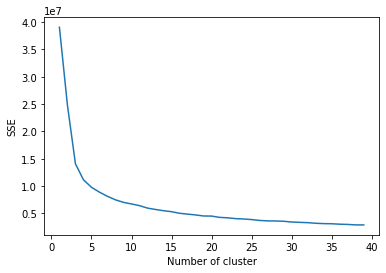

In [44]:
import matplotlib.pyplot as plt
# Sum of Squares errors stored here
sse = {}
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(X)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

plt.savefig('elbow_method_label_based.png')

ideal plot



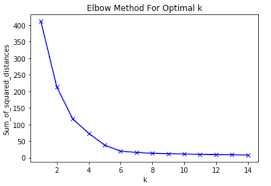

In [45]:
from IPython.display import Image
from IPython.core.display import HTML 
print("ideal plot")
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ8AAAC6CAMAAACHgTh+AAAA5FBMVEX////u7u6FhYXe3t6bm5tubm7h4eGOjo77+/v4+Pj19fXt7e35+fnx8fGwsLCfn5/FxcV1dXX7+//n5+d+fn4AAP+Li4uSkpLIyMi2trbPz8+9vb3Y2Nj09P+np6eAgIDc3P9gYGDV1f9dXV1UVFRtbf/q6v/Kyv97e//v7/9paWm0tP9BQf/p6f/j4/+bm/9mZv9WVv8yMv+Hh//Nzf80NP8oKP+lpf+MjP+hof9KSkqXl/+7u/9KSv+rq/8aGv90dP9gYP+4uP+YmP86OjpbW/89Pf9PT/8SEhImJiYyMjLCwv8q2WK9AAAQEElEQVR4nO1dCVviSBNuchESczQJuckBQTEgiigiHuiMx37r//8/XxJwRNOEY8CQrO8+y2PshKm8dldXVVdXA/CDH/xgP0CH/61w06ILNA4Qj6/wWLZgKIpiRILFmEQTJ4XN0vQNOAZo9lxbfBE9W5l/gqWk96/lAK18evmKaoSfDrtN4XcA4QlCUZclr/K1hVb+kQD2v+kbKjwwy3ONZjl8WeIJYtLcL8Um6c9I47GvPYGBYvjpS2C/IUQvoDusLzc1YDYDyxIq0JSwkA/1Xx2Mm5Ik+zw+/hfTmwGUAOFjLK00STV8jBDCD9EPLA6DMgNY3wSlsaZDz5HgPwEFGQX6tjoWAe83jUrMR5PVED1xj2A3BYEK+XgSDd/ycK3JeoaP8WrEBwZNh6QUHXi4GvaPMaPYWkCrqkkyUAmfFZqCLvmUSOK+Hl5qXvjh2ELAOTyv0PRTybet/4mGV6GA4bFyzIcN8WxfeAkEKIqlkA+PY3wd0swYeIrqkFrEh+2MTWg1PehrER8KsAlbAAYs29FF/KxheID1NJIKL41mOOagLRDAVCM+xqXAYJtSqcnpMBjjUz6e9IxfeAmEqM/rMjs2LN8IKMMHypOJ/VsK+SjbmoyTuMNz+IEaU2CrJgRCmZdpJeKDIACgfNYIrJgPzrNpa2wQMLxbdypTPryQD9w3zCf8vX9Y2b7wEthjCHVTYX3o8cAOAhOYvmR74VxJEzw4YGXJgtBhxSZhqoAnaJkkcQaSXkjFlEveC8SSHPEBjIBsmkAYk4FEBQ7VLEGDJSUuYDESejgW9jkQsCLc6ynmgGVZhmYAw0RdosSFHxw4iFVeJTIgwp8YNvxtiaMr4KACKmz8GyaajirxnBQ9M1OR8Z0EwUS3lKIvpePno4fii/hGLqM3zQrRKPrBnoGXscJDXoMPxeBKRYe3Bh9lat0elT+Qa9z7w8dn/PDxGe98uNf16qm7C2myxyZ8VG9aDzfVnYiTOTYaL73zy8NdCLMHSOUjtJ4rofFLzyzldz7qo9fJoL5rybJBKh+2XHJI44Ag+fjyj/7o3A5vejsXLROk8YGTkOctJXRMp4G+j/nlpHu0c8myQQofB6qJEQYtC3zoQQNgwX8/5tvW4BtkywIpfJi+M/aMg5iP2H9WP/g47e9csmyQwkfJ4j2b4AnDEck4kD1njzWGBZ1gUvVpyazYqgTMeFXjEx/1YUEVyKb2+vPV1kXZC2zKx+nZ1kXZC2zKx9GkmAbZpnz0Ju62RdkLbOzv96+3LcpeYGM+Bq1ti7IX2JiP224hLZCN+TgspgWyebywe79lUfYCm/MxahcxRJbCB63KuiXLBjBlM/7FZz7e7o53Klk2SOsfJRYSxAHAoeXFETL1Ex/upbtLwTJCGh+sAvVAkEQCyDgAlDD+xEe9X0QFksYHbTkGxau6AGQrygKUP6+/tNu7FS0TpMXHKhXMBJajOWwiHhTh/rWACjXJx8HBAR6HS1kYEKIXGFFKW9zyZX2u0W18g4DfjCQfosF7AvLeL3zU7wqoQJJ86LZsYMh7v/BRbRcwqJzkQ1J1Fp2v+HU9+1cBLZAkH7Sus+h0xa98NIbuDiTKFgj9gcnsSuMFHL7+2oVImSLJh8lDazU+wKB4FkiSD071SXT6d4KP++4OJMoWST5YSpJW0x9FXJVCzLcaKK04XuovbzsQKVMg9GlZ0lXkvcn8sbOb7UuULZJ8VHioojcYJfm4ei7aKgzC/hAJIrbHaAXaB2VIAZ4U45YkH43aya4F/GYg5ltZFKf6lCvBsi2qImZ58fq+muDjcHKxawG/GQj9IXDcNGFMIqE6lw+DPSX4qBZOgST50DxIzvxbFiM/+KBpJZmPe/pYsBgIIh4kGVpsjzGShMnT8RLE234R+clHLwWzQJJ8WHAcxLtgWdWx2bJs0TYyvh6jflkwCwRhj+myVEbcic5fL9qydpIPw8CCleJjMUYPWxYoYyT5oCRAach7UXwcdYtlgST4YFXCMFf0X0L0LosVVE7wYTkOQRjIe1F81B+LFVRGjReJWDH+EWHUKpQFgphfRFVdfbyATrdQQWWEvQ5lSkHei+TD7RbKhUHYpzhDr+rvh6gWywJJ8MGbftNfNR4UYfCwXYmyRYKPCsPN/NsKLxisLRjAEhL563MoVl5Mgg+BbMK40ATgTBHy0JBKsh4g8mHecXJeJAsk2T90gdFm44WBfKBzhgKUsINIehPJR73f2a2I3wpEfAyj+Nn8YqusYaumCtTQwS0ZJHo/cqFcGNT6LSQ4EL26GRX34qAmV6b1idDjBXTOdyrh92JBfhAXWmTSUxPjSU+nhebUPluwX70xLJBLt4iPqA4GTdPh/+BPAbwFfBQqLyalfySwqJ5BkRLrkv6tqGmaRaM83EV8dO6KsyqVtE/lseKtY5+GFkjN3aZImQIVPwXr+HMg2mxZnKAyIr4eKKSNuDOlHkp7tEWJsgVCn1o6jq4OuZCP01dQLcg6TJIPHMOk1ePrEartiTu63aZU2QGhP3iZdZD3LuwfvfPuaUGmGIT+UPzymvqj3q0VxadD5ONqtpio6xtjIR+j9rAoBUEQ/q05+4GxVQ3oqgSMZD2DT6heVAf9ggRBEPHkJ28WD9IMyJfNsgXFIO4wC/zbCI2iZNYh/H2WwmfxZAZiIoA2ASJ/Hxf8lHpsg4LUN0CsRzl+c2avC7agRcWKgRPtj8JhCh/uZTEUCGq/BzSm+Q68wui25IgYG5Si65TxAqqDs0Ks0yH0hwixmA9p7CmW7Ik0EUyr0abWL2wUI7UOFf9gtC/zbXo8aIb245ZEyhSI/jH2x6vnB33gZFIEDYKMj1noas1L6n22i1ABA2Gf6qawSf8A7qQANhnCvxVsHV3NfVk92HYr/04dkg9BsFEF3Zfx4RYgTobQp4GuQBMVEVpaL7j9kHsbBBk/ldbID5qHe557GwShTyEkV8+n+4xB7m2QJB8lyRDWyA/6hEbu07dR++dsJ/bnJFEChmjQjDbrLsv5yL8Xg4gHKdCK11/EgGA8QqzwmDwlJM2fm8HNe9UpxP5b3mC1ON9BFBjS5DiF0iJ7lVuU//EJedcgi9azIYj4ADoBDYU1ov4i8ej8oM9wa/k2UhfxEa04iNEyjGOWcXHqz6wwXiIjNdcaJMHH7KhAGQDDG+sq5rAmOTueaqXzG9xarm2QBB8qrzFchcZDTiiKlSgO0NJs+l3tPIt8d5AEH3YzKCs88t7V+GjkOpKaHC+aKRqb+bczPOTZi0HUd1BkeVN7PUYjzwm6qPg6sNZcz/6CPBupiP2EkFfWy3f4irfJEXBzmtSOWJ8zeJFZK5/uK9zu2Vsrp/kx28i3TOBoMszrcShp+bhfsTofw1peU3R30T/cVuOqltNdUwg+DNsWAerVV+XjONSlvyb5PHELEf8geTuuB0OZFJBMHHDmyvGgOVyct/O4+oCo/yFIUrycb0Ci4ggyJRDYyvGgOTRez3I45yLsD0+Wp/l0oiBBQPBKyYyuJTFY73zC3nM/fxtBUPmW7z+FfMhAsBUmjn9IprfmeY0nj6/uX4r37UCMF79cntb7FAUWHpR1RZpRtN54CVFv5a6ELiJ+allWHPAQ/Sdd9RxG92YDZf3zPKuDvMWXEfojIKf7kZnoEHC2Amh2tpi7wfmm1dNhvjJ1Ef5LidPW2/+SivtJriwzRPxDNOyN8j8W4G3ye5PHMkKCD8kgxv6K9T5Xw9F5+xC4OVGsCT7KrBEQfxf/+IqLYeutlZOoe4IPp+SYSG/uL86Ldl9qeTmuLhlfD3wa36I+jeA+dyc5CQAg8j8YwKCypTbno96+qA9qD7lw777jfPVq6NdVG/27PJhm33fe/PHg8mr/u8gyPjiWDQ3V6aLu3/EBwK/Lh72PMi/jw8cEXCaR552sj8bz3hejWsqHBHS7Ep2fTXPY3/IB6qPa1X6HEZfxUYaOIoLoPC1UveD1cTRp7XXUbLk+VT0deMv2z60O9+zlNuwi9T3tJkv4qOg81OXy1L/7a/0Ro346bNV7oz1dsFrCB62ZFrDMaf7DdvgIPd6X/t4eN/199scc3mq1/lVjL0dMFnycnHVuLl9Cp3c7X7dVZMGH+waqt71G+3x4s3edJJPxMsPhr7Nh/+oERJzsCy9Z8hGi9/t1OBi8gYt9CbJmzEfo5t22z8/bd4OjxslxvV6vhh2l1wDVoznX7zv7T+Z8hK/aa9Um/btut3vXf3wYnHauure/zxq9kJ8pC50jcDG/anEYcnU4R9BJFVS3tTK6B3yAi1andXvsXrz9ur++GbT6dy+12vn5Zbf/2GoPRjenD91Rd3R00Wi4U46OBseN9ofVXz29r/6eC78dN0KVPW/uXdTByVw4+zD8ubGIv33go9MA7sf7VOvHg8fXa7dxdHt/PRo8tB6fh7Xay/nwA7XJZHj32u8/P561Wg/t1rB7Pjg9vb66v+90ft12utf3d51GCNd1e73eyah90bo/fke917q/fexVPzrYtQve3k/S2wc+vuJiANzBnNfXaHUeLyKeDns9t9G4uBgMz69uO537+/urq+vTm9F57aX90GqdPT4+91/v7l5rtW5I3yRELcQkpHNyORyeh7i8vHzpht3v5Q+Z7cGg2x203Nm/tQofZiAvOu9kJ6h/9veqUf+Z1x9uq9EZzOmP+0HvoVONUI9x//x4c3x8eHhyctKLcHvXen4Labw4ivHWfu2fde5jJkeDQbvdHtb+HLS4Ah8MpNQ4YWgr/u0W4Lqg2viYf6qN41gnvONw4J6M5pe/rn9Vr+f47I3ck8G8fvn1cPXwfv8KfOByxSQQ50XvK6ohVfX5SO3xNKS9sP26B47W0B+SzOhCtG97nA8+/gor8EHL4nRD0L6Ml11iFX1KYdN8su/Sp1linflWESm86GiuwYepEgtQbgqLmiIIipfaTviprWF7+uPEeEn7ku9X59rX7VBIsOgF8D+QlrTLdGozjcqmn8eyXg7TmxfkM2wOFp0w8gcSukDkO2gVXTDxHZUldAJ0Pd8PoPOd/oDbTq/4AI1OCPhoRxeY/YPSku/fdfsS8X/wdxBJJ30qXmLaMsTsRNkFMOSUUoESVIFFqgv/xDipAoIkFvZQKzptT9yqBpE4nkjViISP3rE5g82nDyjF0BcrKMaEQLYEfVE7J5LA4hRzUXspbOecdebZFWCnKkxNUNEZizMo2IITzWbgAw99QmAMXAY+MBarXCqcXRhn8ReE7Ty/ZAZaE5qDrigzBQOJBRXMp6Bl3UybUWlB5FMmsFX4sFP6LwUlz/ZT/yBrAg9S//wV0/ZSJ2RCs9L+PoxjaSkzavgsxG30FvtYOhLoTsp4tEhWF8apb7AmbJ/U0y0qPpV+yYGp+kUkU0qxSOSYMAJloT61grHgBYv/Acsb28stnB/84Ac5A5M2a/0HYWAgXU3/x2ApuLrEE/xPwfKVnxEzB+sJW+ap/6dgYKLyM14+EM4v+EHWQvzgBz9YCf8HaD1S0kreWBAAAAAASUVORK5CYII=")

In [46]:
pred = model.labels_
print(pred)
y = train
np.unique(pred,return_counts=True)

[5 5 5 ... 4 5 0]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([ 749, 1407,  196,  329,  589,  483,  665,  118,  753,  167]))

In [47]:
for i in range(20):
    print("\n",i,"==>",pred[i])
    print(train.iloc[i,0], " ",train.iloc[i,2]," ",train.iloc[i,3],train.iloc[i,4],train.iloc[i,5],train.iloc[i,6],"<<<<",pred[i],">>>>>")


 0 ==> 5
International Fellowship World Forestry Center   ['conferences']   ['humanities', '', '', 'social', 'sciences'] ['bachelors'] ['all'] ['usa'] <<<< 5 >>>>>

 1 ==> 5
City of Dreams Pavilion 2020: Call for Proposals   ['conferences']   ['engineering', '', '', 'technology'] ['masters'] ['all'] ['usa'] <<<< 5 >>>>>

 2 ==> 5
Urban Confluence Silicon Valley Competition   ['competitions']   ['engineering', '', '', 'technology'] ['all'] ['all'] ['usa'] <<<< 5 >>>>>

 3 ==> 5
REDEFINING LEARNING SPACES   ['competitions']   ['engineering', '', '', 'technology'] ['all'] ['all'] ['usa'] <<<< 5 >>>>>

 4 ==> 6
Mozambique Preschool: Flor da Manhã   ['competitions']   ['engineering', '', '', 'technology'] ['all'] ['all'] ['mozambique'] <<<< 6 >>>>>

 5 ==> 6
OPEN COMPETITION TO DEVELOP CONCEPTUAL DESIGNS FOR GARAGE MUSEUM OF CONTEMPORARY ART’S SUMMER CINEMA   ['competitions']   ['all'] ['all'] ['all'] ['russia'] <<<< 6 >>>>>

 6 ==> 0
International Urban Design Ideas Competition Berlin-Bra